1.Titanic Classification

Make a system which tells whether the person will be save
from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.


Import Necessary Libraries

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

Read in and Explore the data

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Data Analysis

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.rename(columns = {'PassengerId': 'PId'}, inplace = True)

In [6]:
df.rename(columns = {'Sex': 'Gender'}, inplace = True)

In [7]:
df.columns

Index(['PId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.head()

,PId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.sample(5)

,PId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [10]:
print(pd.isnull(df).sum())

PId           0
Survived      0
Pclass        0
Name          0
Gender        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Data Visualization

Gender Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


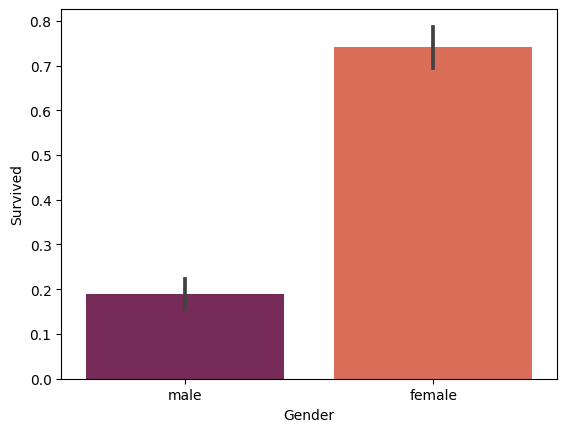

In [12]:
#draw a bar plot of survival by sex
sea.barplot(x="Gender", y="Survived", data=df, palette = 'rocket')

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Gender"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Gender"] == 'male'].value_counts(normalize = True)[1]*100)

Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


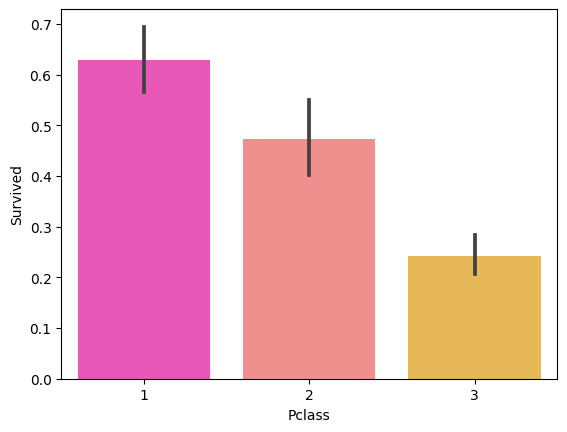

In [13]:
#draw a bar plot of survival by Pclass
sea.barplot(x="Pclass", y="Survived", data=df, palette = 'spring')

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


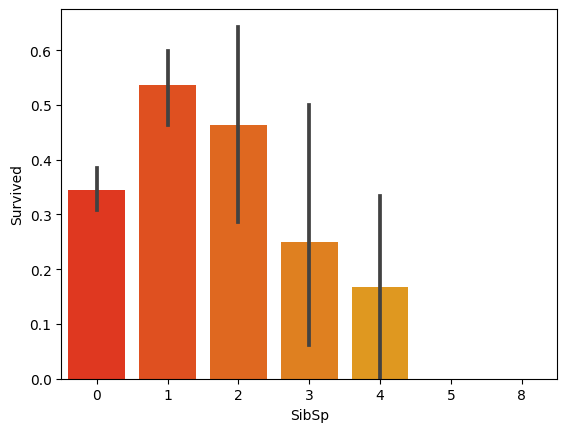

In [14]:
#draw a bar plot for SibSp vs. survival
sea.barplot(x="SibSp", y="Survived", data=df, palette = 'autumn')

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Parch Feature

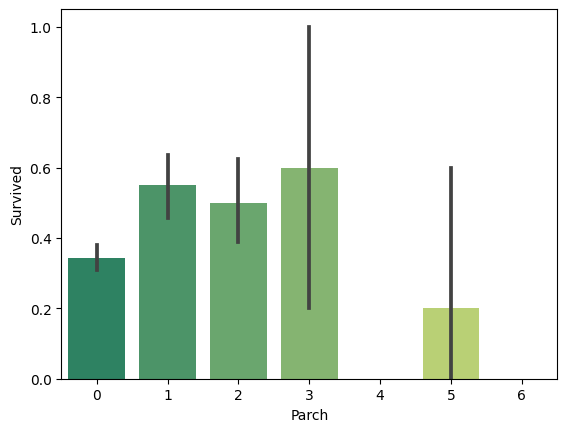

In [15]:
#draw a bar plot for Parch vs. survival
sea.barplot(x="Parch", y="Survived", data=df, palette = 'summer')
plt.show()

Age Feature

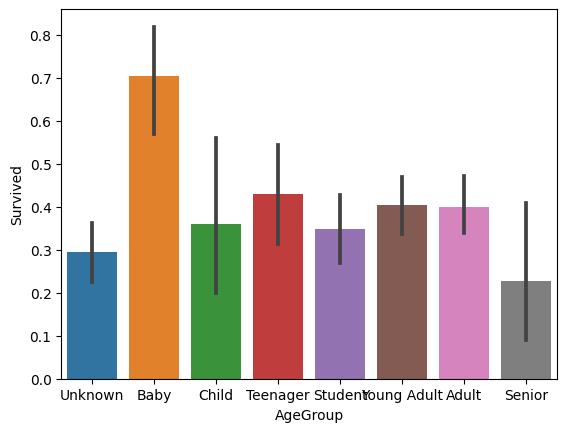

In [16]:
#sort the ages into logical categories
df["Age"] = df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sea.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


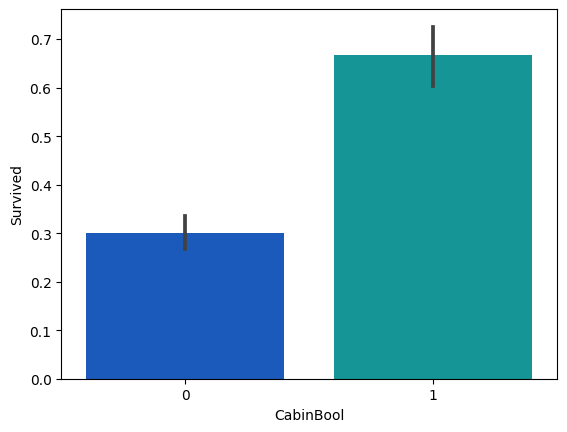

In [17]:
df["CabinBool"] = (df["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", df["Survived"][df["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", df["Survived"][df["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sea.barplot(x="CabinBool", y="Survived", data=df, palette = 'winter')
plt.show()

Data Cleaning

In [18]:
df.describe(include = 'all')

,PId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,0.000000


Cabin Feature

In [20]:
a = df['Cabin'].mode()[0]
df['Cabin'].fillna(a, inplace = True)

Ticket Feature

In [21]:
df = df.drop(['Ticket'], axis = 1)

Embarked Feature

In [22]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df[df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df[df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df[df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [23]:
#replacing the missing values in the Embarked feature with S
df = df.fillna({"Embarked": "S"})

Age Feature

In [24]:
b = df['Age'].mean()
df['Age'].fillna(a, inplace = True)

In [25]:
#create a combined group of both datasets
combine = [df]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Gender'])

Gender,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [27]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df.head()

,PId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,G6,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96 B98,S,Young Adult,0,1


In [28]:
# fill missing age with mode age group for each title
mr_age = df[df["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = df[df["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = df[df["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = df[df["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = df[df["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = df[df["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(df["AgeGroup"])):
    if df["AgeGroup"][x] == "Unknown":
        df["AgeGroup"][x] = age_title_mapping[df["Title"][x]]

In [29]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)

df.head()

#dropping the Age feature for now, might change
df = df.drop(['Age'], axis = 1)

Name Feature

In [30]:
df = df.drop(['Name'], axis = 1)

Gender Feature

In [31]:
#map each gender value to a numerical value
gender_mapping = {"male": 0, "female": 1}
df['Gender'] = df['Gender'].map(gender_mapping)

df.head()

,PId,Survived,Pclass,Gender,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,B96 B98,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C85,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,G6,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,C123,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,B96 B98,S,5.0,0,1


Embarked Feature

In [32]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

df.head()

,PId,Survived,Pclass,Gender,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,B96 B98,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,C85,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,G6,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,C123,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,B96 B98,1,5.0,0,1


Fare Feature

In [33]:
#map Fare values into groups of numerical values
df['FareBand'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
df = df.drop(['Fare'], axis = 1)

In [34]:
df.head()

,PId,Survived,Pclass,Gender,SibSp,Parch,Cabin,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,B96 B98,1,4.0,0,1,1
1,2,1,1,1,1,0,C85,2,6.0,1,3,4
2,3,1,3,1,0,0,G6,1,5.0,0,2,2
3,4,1,1,1,1,0,C123,1,5.0,1,3,4
4,5,0,3,0,0,0,B96 B98,1,5.0,0,1,2


In [35]:
df['AgeGroup'] = df['AgeGroup'].astype(int)

In [36]:
df = df.drop(['Cabin'], axis = 1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PId        891 non-null    int64   
 1   Survived   891 non-null    int64   
 2   Pclass     891 non-null    int64   
 3   Gender     891 non-null    int64   
 4   SibSp      891 non-null    int64   
 5   Parch      891 non-null    int64   
 6   Embarked   891 non-null    int64   
 7   AgeGroup   891 non-null    int64   
 8   CabinBool  891 non-null    int64   
 9   Title      891 non-null    int64   
 10  FareBand   891 non-null    category
dtypes: category(1), int64(10)
memory usage: 70.8 KB


In [38]:
df.head()

,PId,Survived,Pclass,Gender,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1,1
1,2,1,1,1,1,0,2,6,1,3,4
2,3,1,3,1,0,0,1,5,0,2,2
3,4,1,1,1,1,0,1,5,1,3,4
4,5,0,3,0,0,0,1,5,0,1,2


In [39]:
df.sample(8)

,PId,Survived,Pclass,Gender,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
7,8,0,3,0,3,1,1,1,0,4,3
827,828,1,2,0,0,2,2,1,0,4,4
626,627,0,2,0,0,0,3,6,0,6,2
138,139,0,3,0,0,0,1,3,0,1,2
25,26,1,3,1,1,5,1,6,0,3,4
360,361,0,3,0,1,4,1,6,0,1,3
634,635,0,3,1,3,2,1,2,0,2,3
765,766,1,1,1,1,0,1,6,1,3,4


In [40]:
df.shape

(891, 11)

Decision Tree Classifier

In [59]:
#Splitting the Training Data
from sklearn.model_selection import train_test_split
predictors = df.drop(['Survived', 'PId'], axis=1)
target = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)

In [61]:
print(x_val)
print(y_pred)

     Pclass  Gender  SibSp  Parch  Embarked  AgeGroup  CabinBool  Title  \
495       3       0      0      0         2         5          0      1   
648       3       0      0      0         1         5          0      1   
278       3       0      4      1         3         2          0      4   
31        1       1      1      0         2         6          1      3   
255       3       1      0      2         2         5          0      3   
..      ...     ...    ...    ...       ...       ...        ...    ...   
875       3       1      0      0         2         3          0      2   
727       3       1      0      0         3         4          0      2   
428       3       0      0      0         3         5          0      1   
54        1       0      0      1         2         7          1      1   
45        3       0      0      0         1         5          0      1   

    FareBand  
495        3  
648        1  
278        3  
31         4  
255        3  
..       

In [62]:
accuracy = round(accuracy_score(y_pred, y_val) * 100, 2)
print(accuracy)

81.22


In [63]:
y_pred = decisiontree.predict([[1, 1, 3, 0, 2, 3, 0, 2, 3]])

In [64]:
print(y_pred)

[1]
